In [88]:
import pandas as pd
import numpy as np
import random
import gc
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import recall_score, auc, accuracy_score, f1_score, precision_score, classification_report, roc_auc_score
from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import missingno as msno

In [89]:
# 数据训练加载
data = pd.read_csv('./data.csv')
pd.set_option('display.max_columns', None)
data.drop(['user_id','ip'], axis=1, inplace=True)
# data.drop(['user_id','ip','game_pay_num', 'chmoney_pay_num'], axis=1, inplace=True)
data = data.select_dtypes(include='number')
print(data.shape)

(642751, 42)


In [90]:
# 加载测试数据
data_test = pd.read_csv('./data_test.csv')
pd.set_option('display.max_columns', None)
data_test.drop(['user_id','ip','city'], axis=1, inplace=True)
# data.drop(['user_id','ip','game_pay_num', 'chmoney_pay_num'], axis=1, inplace=True)
data_test = data_test.select_dtypes(include='number')
print(data_test.shape)

(591088, 42)


In [91]:
# data.fillna(0, inplace=True)
# data = data.replace([np.inf,-np.inf], np.nan)
# data.dropna(how='any', inplace=True)
data = data.replace([np.inf,-np.inf], np.nan)
data.dropna(how='any', inplace=True)

data_test = data_test.replace([np.inf,-np.inf], np.nan)
data_test.dropna(how='any', inplace=True)


In [92]:
data.head()

,role_level,net_type,u1,u2,u3,u4,u5,u6,g7,g8,g9,g10,is_create_role,is_create_no,platform,user_type,user_flag,mobile,game_pay_num,chmoney_pay_num,server_sum,rollsrv,m1,m2,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,is_pay,s1,s2,s3,s4,s5,s6,s7
0,4,0.0,1,1,1,1,0.0,0.0,136657,151468,129869,1813367,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2815759.0,16429.0,5270.0,5413.0,5206.0,133.462657,0.770520,0.027391,1021.0,1209.0,1033.0,0.0,0.009060,0.038564,0.035737,0.040087,0.193738,0.223351,0.198425
1,4,0.0,1,1,1,1,0.0,0.0,136657,151468,129869,1813367,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2815759.0,16429.0,5270.0,5413.0,5206.0,133.462657,0.770520,0.027391,1021.0,1209.0,1033.0,0.0,0.009060,0.038564,0.035737,0.040087,0.193738,0.223351,0.198425
2,0,0.0,1,1,1,1,0.0,0.0,2799,2883,2463,20322,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,32322.0,240.0,90.0,92.0,85.0,34.900000,0.029500,0.000000,45.0,55.0,49.0,0.0,0.011810,0.032154,0.031911,0.034511,0.500000,0.597826,0.576471
3,73,1.0,1,1,1,1,0.0,0.0,9564,10386,9338,222150,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,408350.0,5562.0,723.0,737.0,717.0,60.310859,0.528357,0.191837,117.0,151.0,123.0,0.0,0.025037,0.075596,0.070961,0.076783,0.161826,0.204885,0.171548
4,226,2.0,1,1,1,1,0.0,0.0,17669,19404,12415,429231,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,1577912.0,3730.0,760.0,772.0,680.0,64.489008,3.191399,0.060858,196.0,260.0,162.0,0.0,0.008690,0.043013,0.039786,0.054772,0.257895,0.336788,0.238235


In [59]:
# data_test.shape

In [93]:
data['is_pay'].value_counts()

0.0    389947
1.0     15961
Name: is_pay, dtype: int64

In [6]:
# data_test['is_pay'].value_counts()

In [94]:
target = data['is_pay']
features = data.drop(['is_pay'], axis=1)

In [95]:
target_test = data_test['is_pay']
features_test = data_test.drop(['is_pay'], axis=1)

In [96]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=0, sample)
features, target = smo.fit_sample(features, target)

In [97]:
target.value_counts()

1.0    389947
0.0    389947
Name: is_pay, dtype: int64

In [98]:
X_val, x_test, Y_val, y_test = train_test_split(features_test,target_test, test_size=0.5)
params = {
"objective": "binary",
"boosting_type": "gbdt",
"learning_rate": 0.01,
"max_depth":3,
"num_leaves":35,
"min_child_samples":15,
"feature_fraction": 0.5,
"bagging_fraction":0.5,
"bagging_freq":10,
"lambda_l1":10,
"lambda_l2":50,
"metric": "auc",
}

train_data = lgb.Dataset(features, label=target)
val_data = lgb.Dataset(X_val, label=Y_val, reference=train_data)
model = lgb.train(params, train_data, num_boost_round=2000, early_stopping_rounds=100, valid_sets=[train_data, val_data])

[1]	training's auc: 0.910851	valid_1's auc: 0.839568
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.935678	valid_1's auc: 0.889833
[3]	training's auc: 0.932763	valid_1's auc: 0.894957
[4]	training's auc: 0.937219	valid_1's auc: 0.899209
[5]	training's auc: 0.939293	valid_1's auc: 0.897568
[6]	training's auc: 0.942633	valid_1's auc: 0.897573
[7]	training's auc: 0.944994	valid_1's auc: 0.896815
[8]	training's auc: 0.945041	valid_1's auc: 0.893931
[9]	training's auc: 0.944915	valid_1's auc: 0.891652
[10]	training's auc: 0.946277	valid_1's auc: 0.890754
[11]	training's auc: 0.945971	valid_1's auc: 0.893801
[12]	training's auc: 0.946467	valid_1's auc: 0.897282
[13]	training's auc: 0.94553	valid_1's auc: 0.897522
[14]	training's auc: 0.946305	valid_1's auc: 0.898238
[15]	training's auc: 0.945581	valid_1's auc: 0.897572
[16]	training's auc: 0.944948	valid_1's auc: 0.898326
[17]	training's auc: 0.944024	valid_1's auc: 0.898149
[18]	training's auc: 0.943076	

[152]	training's auc: 0.952436	valid_1's auc: 0.901554
[153]	training's auc: 0.95245	valid_1's auc: 0.901493
[154]	training's auc: 0.952556	valid_1's auc: 0.901474
[155]	training's auc: 0.952567	valid_1's auc: 0.901368
[156]	training's auc: 0.952577	valid_1's auc: 0.901237
[157]	training's auc: 0.952587	valid_1's auc: 0.901178
[158]	training's auc: 0.952631	valid_1's auc: 0.901155
[159]	training's auc: 0.952639	valid_1's auc: 0.901011
[160]	training's auc: 0.952648	valid_1's auc: 0.900943
[161]	training's auc: 0.952691	valid_1's auc: 0.900921
[162]	training's auc: 0.952687	valid_1's auc: 0.900835
[163]	training's auc: 0.952669	valid_1's auc: 0.900758
[164]	training's auc: 0.952658	valid_1's auc: 0.900823
[165]	training's auc: 0.95284	valid_1's auc: 0.900869
[166]	training's auc: 0.952874	valid_1's auc: 0.900841
[167]	training's auc: 0.952897	valid_1's auc: 0.900759
[168]	training's auc: 0.952893	valid_1's auc: 0.900834
[169]	training's auc: 0.952921	valid_1's auc: 0.900806
[170]	traini

In [181]:
# # categorical_features = ['p_model', 'sys_ver', 'net_w', 'sdk_no', 'city']
# selected_features = features_list
# # selected_features = np.setdiff1d(features_list, categorical_features)
# features = data_train[selected_features]
# target = data['is_pay']
# X_train, x_val, Y_train, y_val = train_test_split(features,target, test_size=0.2)
# params = {
# "objective": "binary",
# "boosting_type": "gbdt",
# "learning_rate": 0.01,
# "max_depth":3,
# "num_leaves":35,
# "min_child_samples":15,
# "feature_fraction": 0.5,
# "bagging_fraction":0.5,
# "bagging_freq":10,
# "lambda_l1":10,
# "lambda_l2":50,
# "metric": "auc",
# }

# train_data = lgb.Dataset(X_train, label=Y_train)
# val_data = lgb.Dataset(x_val, label=y_val, reference=train_data)
# model = lgb.train(params, train_data, num_boost_round=2000, early_stopping_rounds=100, valid_sets=[train_data, val_data])

In [20]:
# # 决策树模型
# from sklearn.tree import DecisionTreeClassifier
# import joblib
# dtc = DecisionTreeClassifier()
# dtc.fit(features, target)
# joblib.dump(dtc, './dct.m')

['./dct.m']

In [99]:
y_predict_val = model.predict(X_val)
# fpr, tpr = auc(Y_val, y_predict_val)
# print(auc(fpr, tpr))
auc_score = roc_auc_score(Y_val, y_predict_val)
print(auc_score)

0.9042624102109589


In [100]:
# 测试集上的准确率
y_predict_val = model.predict(X_val)
sessoin = pd.DataFrame(y_predict_val, columns=['is_pay'])
sessoin['is_pay']=sessoin['is_pay'].apply(lambda x:1 if x>=0.5 else 0)
y_predict_val = sessoin['is_pay'].values
print(recall_score(Y_val, y_predict_val, average=None))
print(precision_score(Y_val, y_predict_val))
print(accuracy_score(Y_val, y_predict_val))
print(f1_score(Y_val, y_predict_val))

[0.78854091 0.87164143]
0.16306806498046472
0.7922916218793582
0.2747377538254258


In [101]:
# 测试集上的准确率
y_predict_test = model.predict(x_test)
sessoin = pd.DataFrame(y_predict_test, columns=['is_pay'])
sessoin['is_pay']=sessoin['is_pay'].apply(lambda x:1 if x>=0.5 else 0)
y_predict_test = sessoin['is_pay'].values
print(recall_score(y_test, y_predict_test, average=None))

[0.78823978 0.87518213]


In [102]:
print(precision_score(y_test, y_predict_test))
print(recall_score(y_test, y_predict_test, average=None))
print(accuracy_score(y_test, y_predict_test))
print(roc_auc_score(y_test, y_predict_test))
print(f1_score(y_test, y_predict_test))

0.16426618049225158
[0.78823978 0.87518213]
0.7921868884809798
0.8317109525229142
0.2766137078824161


<Figure size 864x432 with 0 Axes>

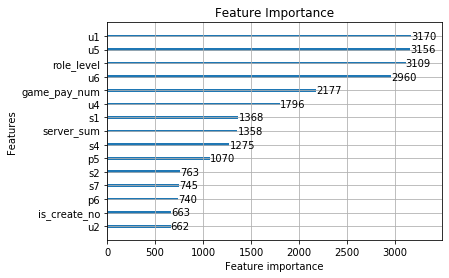

In [30]:
plt.figure(figsize=(12,6))
lgb.plot_importance(model, max_num_features=15)
plt.title('Feature Importance')
plt.show()

In [167]:
import joblib
joblib.dump(model, './lgb_model_num_2.m')

['./lgb_model_num_2.m']